# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [1]:
install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

package 'kohonen' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nicol\AppData\Local\Temp\Rtmp25AL9E\downloaded_packages


[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

In [2]:
help(som)

supersom                package:kohonen                R Documentation

_S_e_l_f- _a_n_d _s_u_p_e_r-_o_r_g_a_n_i_s_i_n_g _m_a_p_s

_D_e_s_c_r_i_p_t_i_o_n:

     A supersom is an extension of self-organising maps (SOMs) to
     multiple data layers, possibly with different numbers and
     different types of variables (though equal numbers of objects).
     NAs are allowed. A weighted distance over all layers is calculated
     to determine the winning units during training.  Functions 'som'
     and 'xyf' are simply wrappers for supersoms with one and two
     layers, respectively. Function 'nunits' is a utility function
     returning the number of units in the map.

_U_s_a_g_e:

     som(X, ...)
     xyf(X, Y, ...)
     supersom(data, grid=somgrid(), rlen = 100, alpha = c(0.05, 0.01),
              radius = quantile(nhbrdist, 2/3), 
              whatmap = NULL, user.weights = 1, maxNA.fraction = 0L,
              keep.data = TRUE, dist.fcts 

[[1]]
           V1         V2         V3          V4          V5         V6
V1 -0.9886188 -0.9781013 -0.9019465 -1.03530414  0.58627308 -0.6501815
V2 -0.2283528 -0.2662925 -0.3806364 -0.05836485 -1.00338847 -0.7207314
V3  0.4408228  0.5056410  0.5036363  0.41627012  0.16727905  0.5296840
V4  1.4241054  1.4172464  1.4136546  1.30530125 -0.07328373  1.4307335



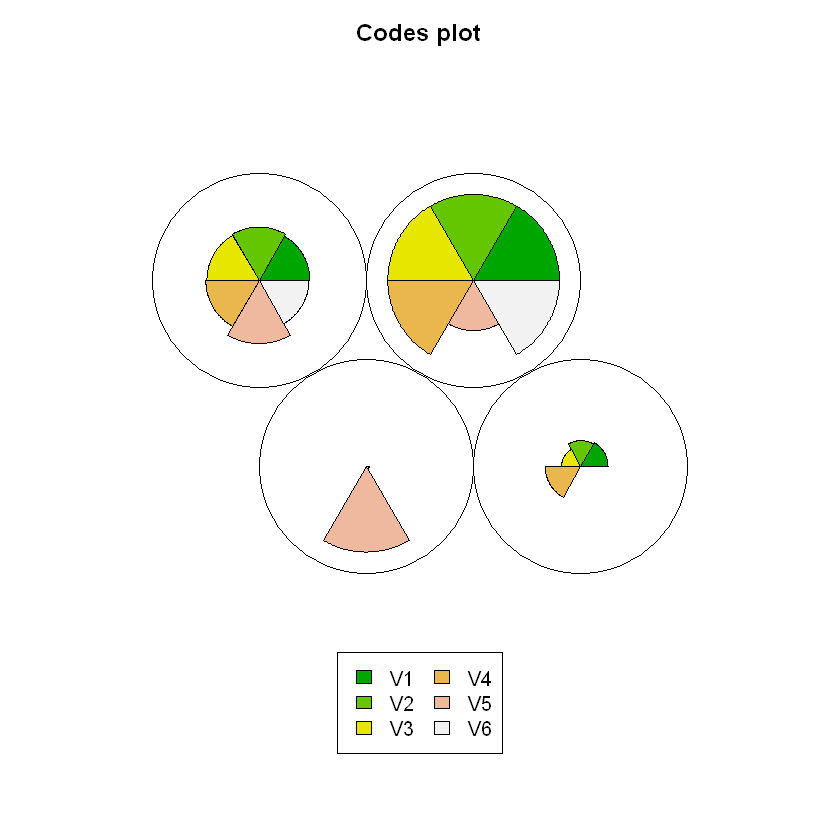

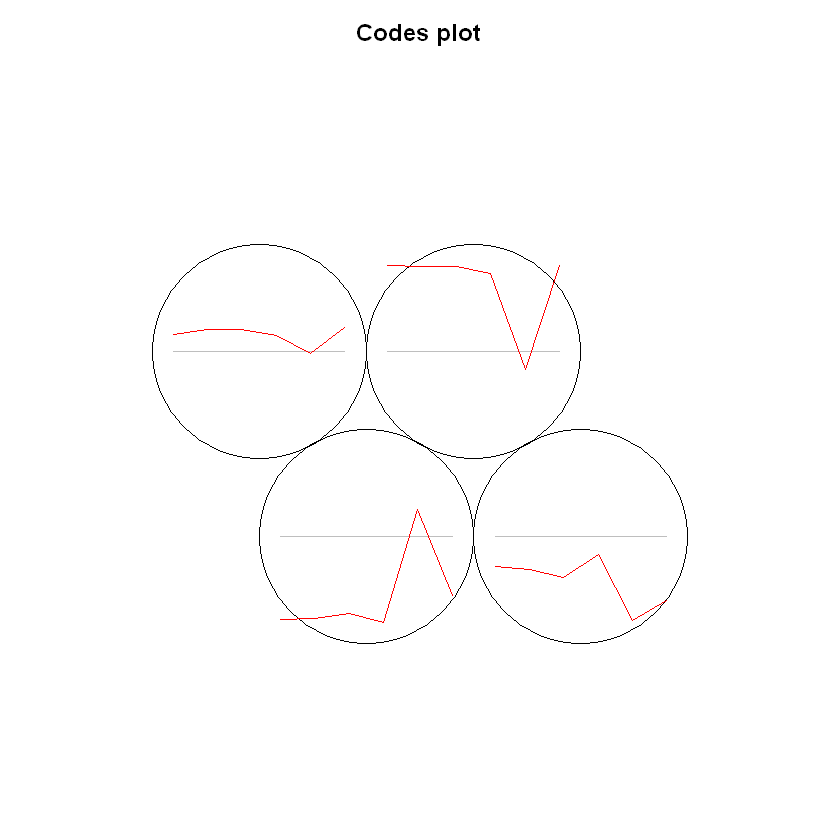

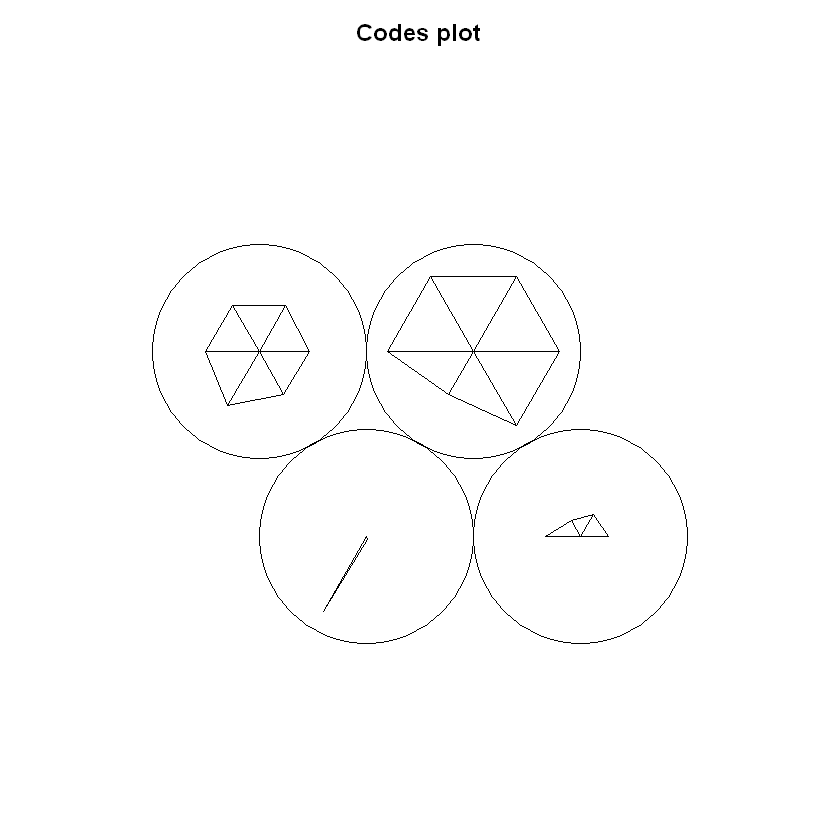

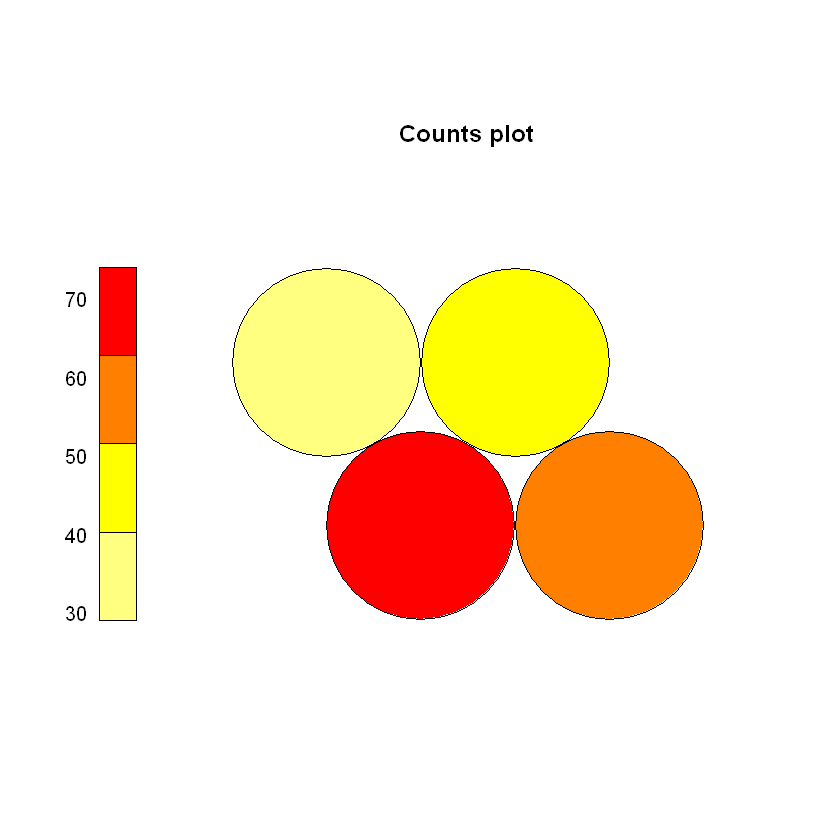

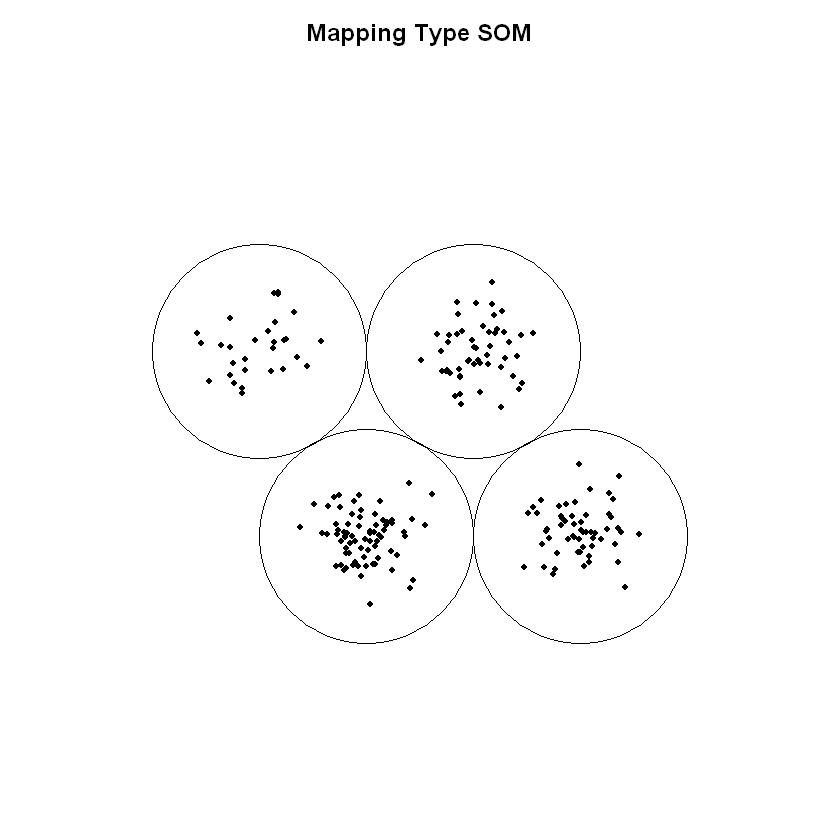

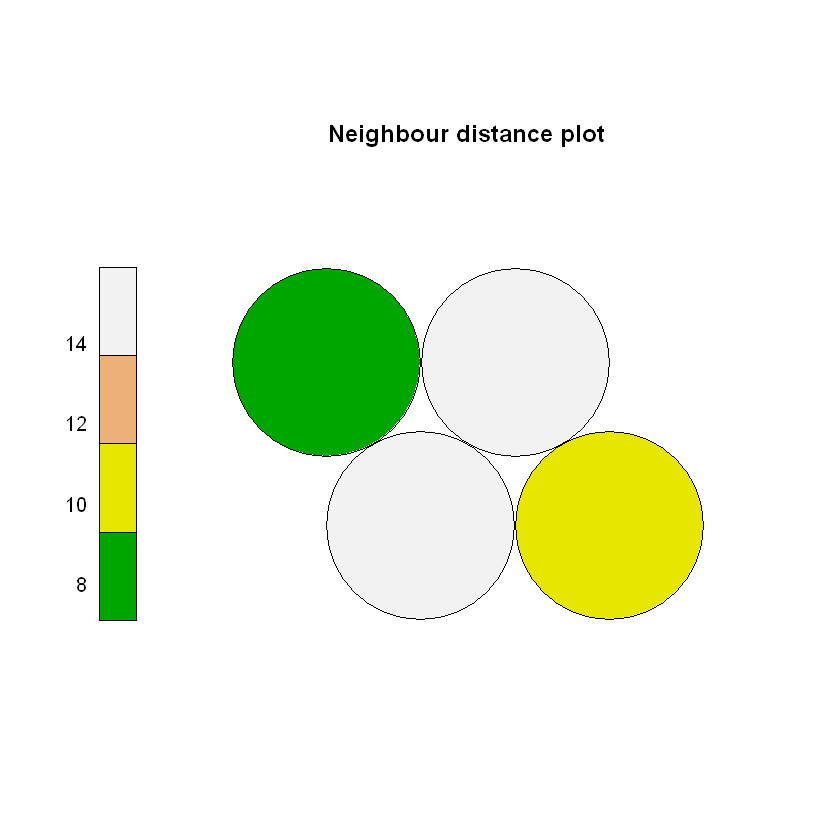

In [3]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

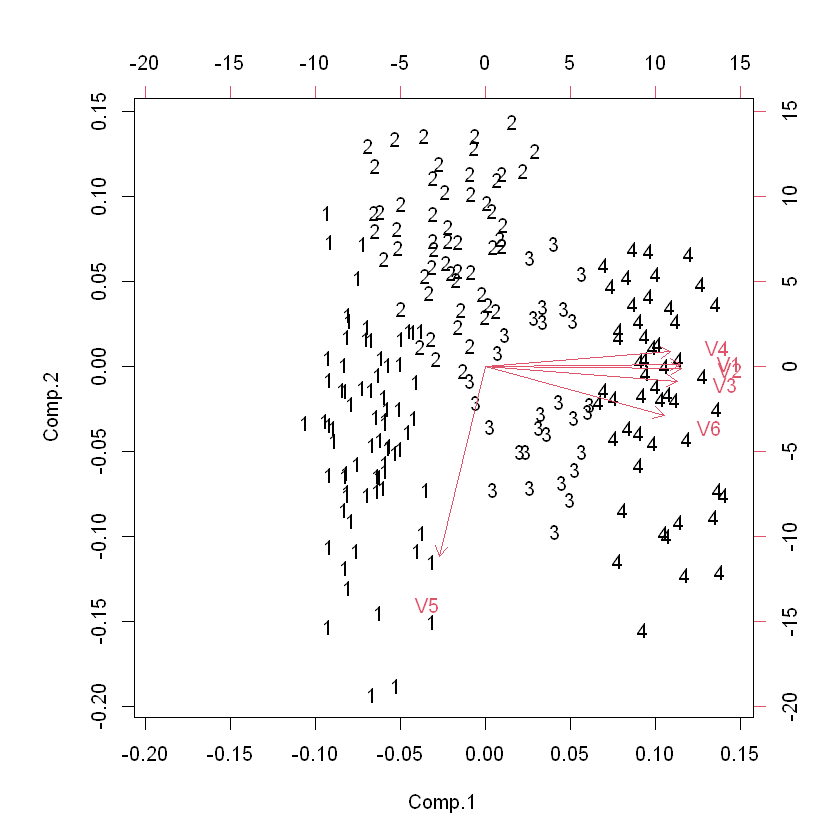

In [4]:
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)

#### **Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo datosComunas.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 

b) Proponga una estrategia gráfica para representarlos.